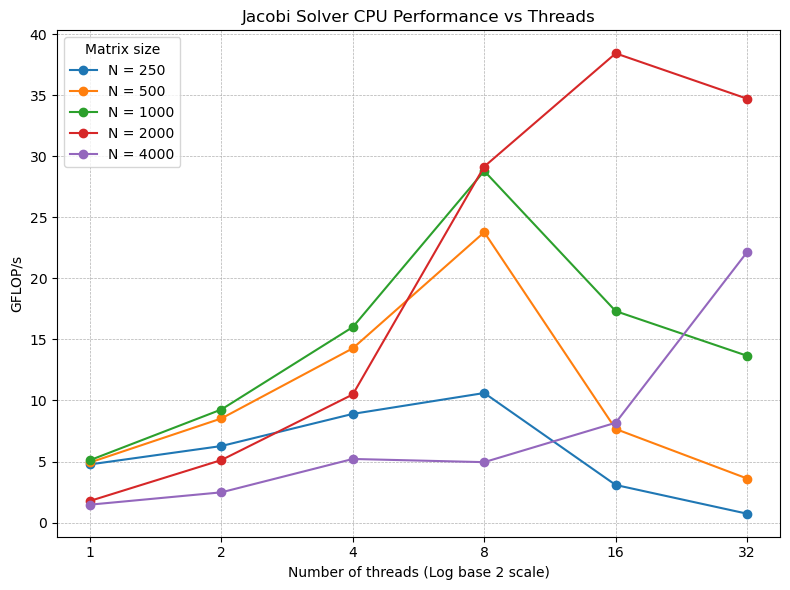

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
csv_path = "/mnt/scratch/bowmand8/cmse822-codex-ss25/projects/project4/Timing_Results/results.csv"

# Load the results
df = pd.read_csv(csv_path)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

for size, group in df.groupby("size"):
    ax.plot(
        group["threads"],
        group["gflops"],
        marker="o",
        linestyle="-",
        label=f"N = {size}"
    )

# Configure axes
ax.set_xscale("log", base=2)
ax.set_xticks([1, 2, 4, 8, 16, 32])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

ax.set_xlabel("Number of threads (Log base 2 scale)")
ax.set_ylabel("GFLOP/s")
ax.set_title("Jacobi Solver CPU Performance vs Threads")
ax.legend(title="Matrix size")
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


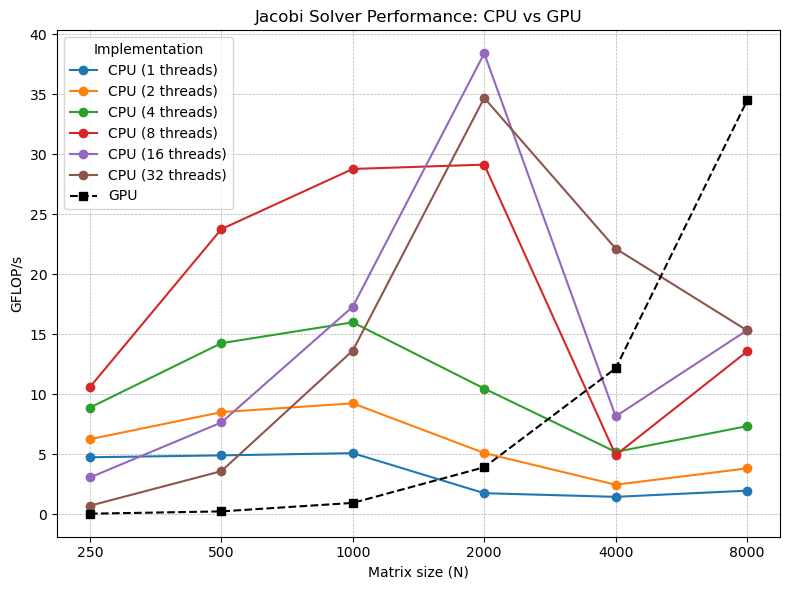

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your CSV files
cpu_csv = "/mnt/scratch/bowmand8/cmse822-codex-ss25/projects/project4/Timing_Results/results.csv"
gpu_csv = "/mnt/scratch/bowmand8/cmse822-codex-ss25/projects/project4/Timing_Results/results_gpu.csv"

# Load data
cpu_df = pd.read_csv(cpu_csv)
gpu_df = pd.read_csv(gpu_csv)

# Sort GPU results by matrix size
gpu_df = gpu_df.sort_values("size")

# Begin plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot CPU lines, one per thread count
for threads, grp in cpu_df.groupby("threads"):
    grp = grp.sort_values("size")
    ax.plot(
        grp["size"],
        grp["gflops"],
        marker="o",
        linestyle="-",
        label=f"CPU ({threads} threads)"
    )

# Plot GPU line
ax.plot(
    gpu_df["size"],
    gpu_df["gflops"],
    marker="s",
    linestyle="--",
    color="black",
    label="GPU"
)

# Configure axes
ax.set_xscale("log", base=2)
sizes = sorted(cpu_df["size"].unique())
ax.set_xticks(sizes)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

ax.set_xlabel("Matrix size (N)")
ax.set_ylabel("GFLOP/s")
ax.set_title("Jacobi Solver Performance: CPU vs GPU")
ax.legend(title="Implementation")
ax.grid(True, which="both", ls="--", lw=0.5)

plt.tight_layout()
plt.show()
